In [2]:
# Import 
import matplotlib.pyplot as plt
from lab2_functions import euler, leapfrog, runge, midpoint
import numpy as np


In [3]:
# Definitions
theFuncs = {
    'euler': euler,
    'leapfrog': leapfrog,
    'runge': runge,
    'midpoint': midpoint
}


def eval_fun(fun_choice, arg_dict):
    """
    Parameters
    ----------
    fun_choice: str
       name of finite difference approx from lab2_functions
    arg_dict: dict
       dictionary of arguments for lab2_functions
    Returns
    -------
    approxTime, approxTemp: tuple
        tuple of ndarray float vectors with time and temperature
    """
    npts = arg_dict['npts']
    tend = arg_dict['tend']
    To = arg_dict['To']
    Ta = arg_dict['Ta']
    theLambda = arg_dict['theLambda']
    approxTime, approxTemp = theFuncs[fun_choice](npts, tend, To, Ta,
                                                  theLambda)
    return approxTime, approxTemp



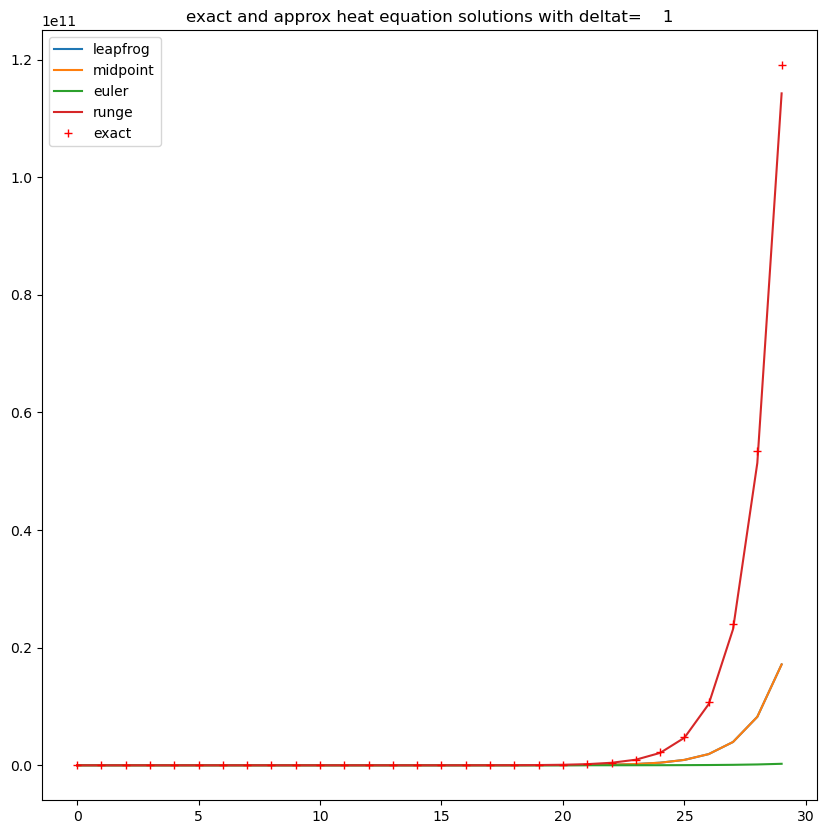

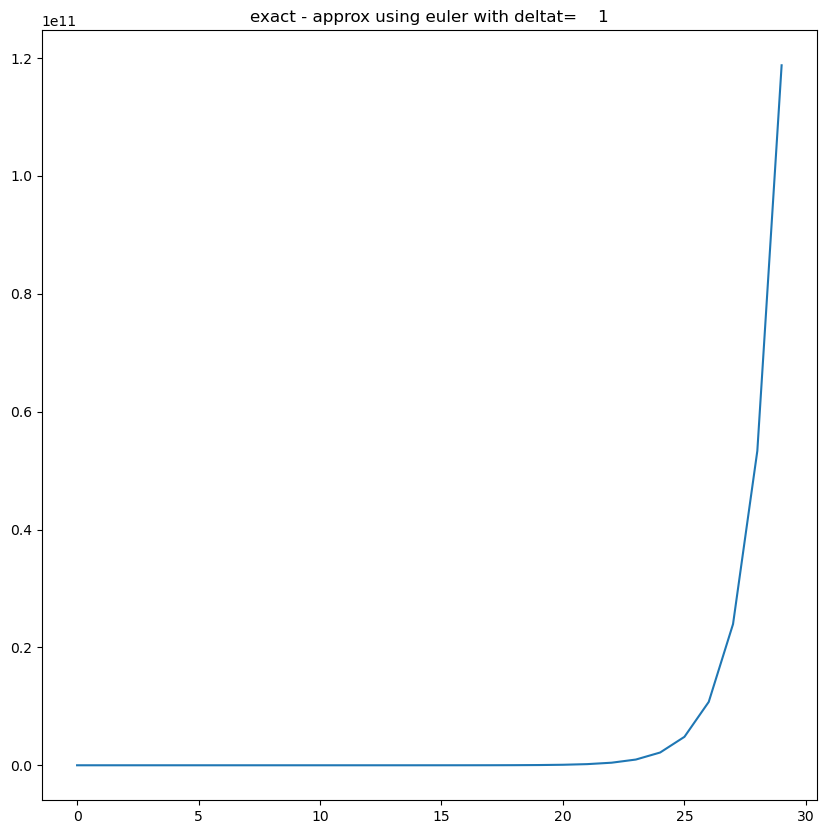

In [6]:
# %%
if __name__ == "__main__":

    Ta = 20
    To = 30
    tend = 30.0
    theLambda = 0.8
    npts = 30

    default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
    #
    # start a plot to show all the functions
    #
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
    keep_curves = dict()
    fun_list = ['leapfrog', 'midpoint', 'euler', 'runge']
    #
    # add a curve for each function in fun_list
    #
    for fun_choice in fun_list:
        approxTime, approxTemp = eval_fun(fun_choice, default_args)
        ax1.plot(approxTime, approxTemp, label=fun_choice)
        keep_curves[fun_choice] = (approxTime,approxTemp)
    #
    # now add the exact solution for comparison
    #
    exactTime = np.empty_like(approxTime)
    exactTemp = np.empty_like(exactTime)
    for i in range(npts):
        exactTime[i] = tend * i / npts
        exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
    ax1.plot(exactTime, exactTemp, 'r+', label='exact')
    deltat=tend / npts
    title = f"exact and approx heat equation solutions with deltat={deltat:5.2g}"
    ax1.set(title=title)
    ax1.legend(loc='best')
    #
    # Make a second plot that shows the difference between exact and euler
    #
    fig2, ax2 = plt.subplots(1, 1,figsize=(10,10))
    fun_choice = 'euler'
    approxTemp = keep_curves[fun_choice][1]
    difference = exactTemp - approxTemp
    ax2.plot(exactTime, difference)
    title = f"exact - approx using {fun_choice} with deltat={deltat:5.2g}"
    ax2.set(title=title)
    plt.show()


In [7]:
difference

array([0.00000000e+00, 4.25540928e+00, 1.71303242e+01, 5.19117638e+01,
       1.40349302e+02, 3.57024700e+02, 8.74981935e+02, 2.09204404e+03,
       4.91645432e+03, 1.14107147e+04, 2.62391126e+04, 5.99155991e+04,
       1.36079502e+05, 3.07773292e+05, 6.93823082e+05, 1.56008151e+06,
       3.50073497e+06, 7.84270644e+06, 1.75472836e+07, 3.92196330e+07,
       8.75862816e+07, 1.95469344e+08, 4.36001507e+08, 9.72096865e+08,
       2.16660516e+09, 4.82756329e+09, 1.07541904e+10, 2.39523422e+10,
       5.33401302e+10, 1.18770425e+11])